# Numerical solution of 2D Heat transfer equation
The heat equation is  
$$
\frac{\partial \theta}{\partial t}
= \alpha \nabla² \theta
$$

- $\theta$ ... temperature
- a ... thermal diffusivity
- t ... time

## Transforming the heat equation into two dimensions and discrete form:
1. General Derivative
$$
\frac{df}{dx} \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

2. Derivatives of the heat transfer in x-direction
$$
\frac{\partial \theta}{\partial x}\bigg|_{m,j}
\approx 
\frac{\theta_{i+1} - \theta_i}{\Delta x}
$$
$$
\frac{\partial^2 \theta}{\partial x^2}\bigg|_{m,j}
\approx 
\frac{\theta_{i+1} - 2\theta_i + \theta_{i-1}}{\Delta x^2}
$$

3. Derivatives of the heat transfer in y-direction
$$
\frac{\partial \theta}{\partial y}\bigg|_{m,i}
\approx 
\frac{\theta_{j+1} - \theta_j}{\Delta y}
$$
$$
\frac{\partial^2 \theta}{\partial y^2}\bigg|_{m,i}
\approx 
\frac{\theta_{j+1} - 2\theta_j + \theta_{j-1}}{\Delta y^2}
$$

4. Derivatives of the heat transfer over time
$$
\frac{\partial \theta}{\partial t}\bigg|_{i,j}
\approx 
\frac{\theta^{m+1} - \theta^m}{\Delta t}
$$


5. Putting everything in the heat equation
$$
\frac{\theta_{i,j}^{m+1} - \theta_{i,j}^m}{\Delta t}
=
a
\left(
\frac{\theta_{i+1,j}^m - 2\theta_{i,j}^m + \theta_{i-1,j}^m}{\Delta x^2}
+
\frac{\theta_{i,j+1}^m - 2\theta_{i, j}^m + \theta_{i,j-1}^m}{\Delta y^2}
\right)
$$

6. Assumption of an uniform square as a cell ($\Delta x = \Delta y$)
$$
\frac{\theta_{i,j}^{m+1} - \theta_{i,j}^m}{\Delta t}
=
a
\left(
\frac{\theta_{i+1, j}^m  + \theta_{i-1, j}^m + \theta_{i,j+1}^m  + \theta_{i,j-1}^m- 4\theta_{i,j}^m}{\Delta x^2}
\right)
$$

7. Rearranging for $\theta_{i,j}^{m+1}$
$$
\theta_{i,j}^{m+1}
=
\theta_{i,j}^m
+
\frac{a \Delta t}{\Delta x^2}
\left(
\theta_{i+1, j}^m  + \theta_{i-1, j}^m + \theta_{i,j+1}^m  + \theta_{i,j-1}^m- 4\theta_{i,j}^m
\right)
$$

## Applying the discrete heat transfer equation

### Imports

In [27]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numba
from numba import prange
from IPython.display import Video
import datetime

### Creating the meshgrid / Loading Image

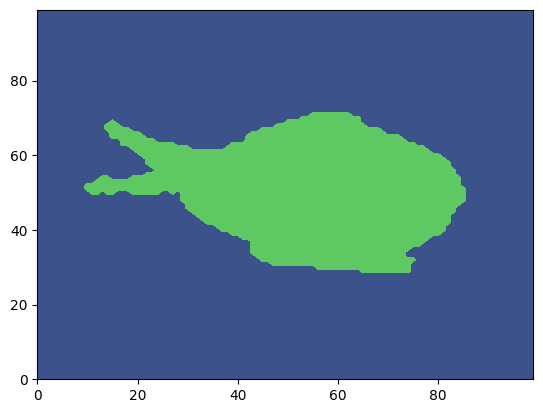

In [28]:
# Image
img = iio.imread('../img/turkey.png') # Load image
img = np.flip(img, axis=0)  # Flip the image vertically
boolean_matrix = np.zeros([img.shape[0], img.shape[1]], dtype=bool)
boolean_matrix[:, :] = [value for value in (img[:, :, 0] < 200)]  # Create boolean matrix of the turkey region
plt.contourf(boolean_matrix)  # Plot the boolean matrix

### Calculating the heatmap

Defining the Parameters

In [29]:
# Parameters
a = 1.32e-7  # Diffusion constant

# discretization
dx = 0.5 / 100
dt = 1
times = int(36000)# total time in seconds
num_snapshots = int(3600)
step = int(times / num_snapshots) # Snapshot every 10 steps

# Initial temperatures
theta_0_oven = 180.0 + 273.15 # K
theta_0_turkey = 20.0 + 273.15 # K

In [30]:
heatmap = np.zeros((img.shape[0], img.shape[1]), dtype=float) # Heatmap in °C
heatmap[boolean_matrix] = theta_0_turkey
heatmap[~boolean_matrix] = theta_0_oven


In [31]:
def solve_heat_equation(heatmap, boolean_matrix, a, dx, dt):
  cs = heatmap.copy() # current state
  cf = 0 # current frame
  length = len(cs[0])
  frames = []
  coeff = a * dt / dx**2
  for m in range(1, times):
    ns = cs.copy() # new state
    for i in range(1, length - 1):
      for j in range(1, length - 1):
        if boolean_matrix[i, j]: # Only update turkey region
          ns[i, j] = cs[i, j] + coeff * (cs[i+1, j] + cs[i-1, j] + cs[i, j+1] + cs[i, j-1] - 4 * cs[i, j])
    cs = ns.copy()

    if m % step == 0:
      cf += 1
      frames.append(cs)
      print(f"Computed frame {cf} at time {m} seconds")

  return frames

In [32]:
heat_frames = solve_heat_equation(heatmap, boolean_matrix, a, dx, dt)
heat_frames = np.array(heat_frames)  # Convert list to numpy array
heat_frames -= 273.15  # Convert to Celsius

Computed frame 1 at time 10 seconds
Computed frame 2 at time 20 seconds
Computed frame 3 at time 30 seconds
Computed frame 4 at time 40 seconds
Computed frame 5 at time 50 seconds
Computed frame 6 at time 60 seconds
Computed frame 7 at time 70 seconds
Computed frame 8 at time 80 seconds
Computed frame 9 at time 90 seconds
Computed frame 10 at time 100 seconds
Computed frame 11 at time 110 seconds
Computed frame 12 at time 120 seconds
Computed frame 13 at time 130 seconds
Computed frame 14 at time 140 seconds
Computed frame 15 at time 150 seconds
Computed frame 16 at time 160 seconds
Computed frame 17 at time 170 seconds
Computed frame 18 at time 180 seconds
Computed frame 19 at time 190 seconds
Computed frame 20 at time 200 seconds
Computed frame 21 at time 210 seconds
Computed frame 22 at time 220 seconds
Computed frame 23 at time 230 seconds
Computed frame 24 at time 240 seconds
Computed frame 25 at time 250 seconds
Computed frame 26 at time 260 seconds
Computed frame 27 at time 270 

### Live Plot of the Heat Transfer 

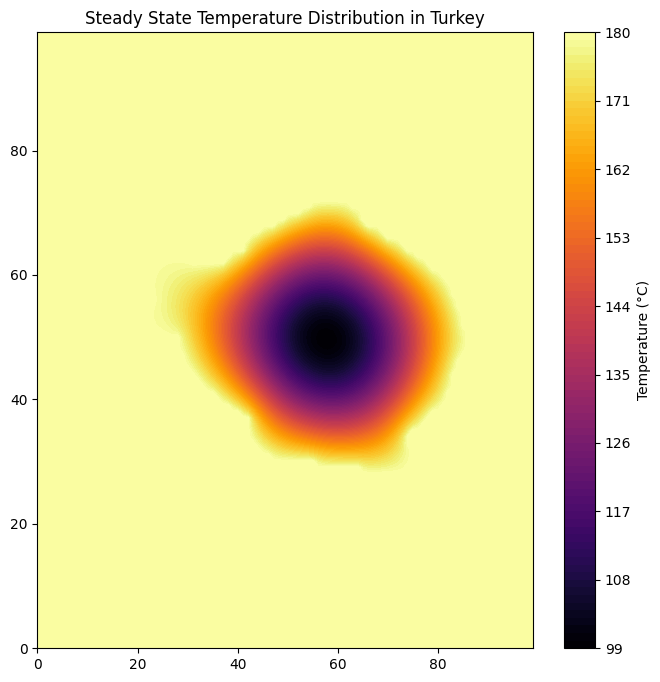

In [36]:
# steady state plot
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
a = plt.contourf(heat_frames[2000], 100, cmap=cmap)
plt.colorbar(a, label='Temperature (°C)')
plt.title('Steady State Temperature Distribution in Turkey')
plt.show()

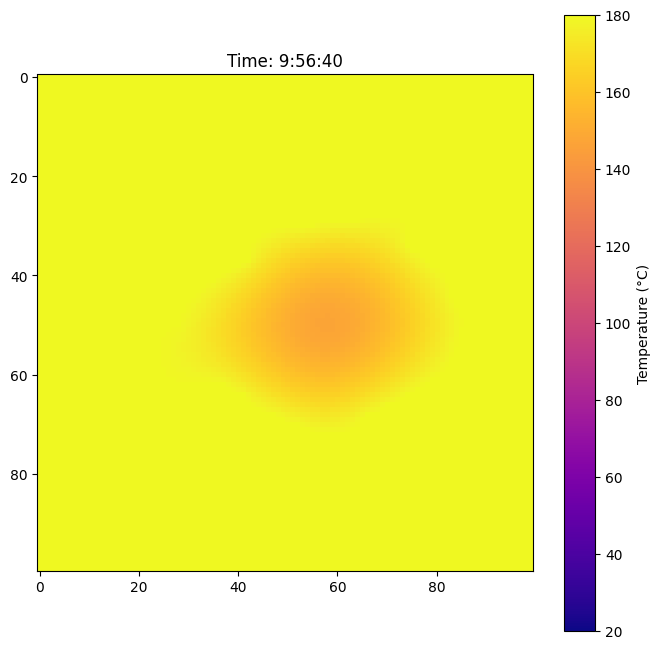

In [51]:
# Live animation
fig, ax = plt.subplots(figsize=(8,8))
vmin = theta_0_turkey - 273.15
vmax = theta_0_oven - 273.15
fast_forward = 10  # show every 20th frame

# use imshow and update the image data for faster/more reliable animation in notebooks
im = ax.imshow(heat_frames[0], cmap='plasma', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=ax, label='Temperature (°C)')
def animate(i):
  im.set_data(heat_frames[i*fast_forward])
  # compute real time for this snapshot: i * step * dt (seconds)
  seconds = int(i*fast_forward * step * dt)
  time_str = str(datetime.timedelta(seconds=seconds))
  ax.set_title(f'Time: {time_str}')
  return [im]
ani = animation.FuncAnimation(fig, animate, frames=heat_frames.shape[0]//fast_forward, interval=200, blit=True)
ani.save('../img/heat_anim.gif', writer=PillowWriter(fps=30))

### Average and Minimum Temperature 

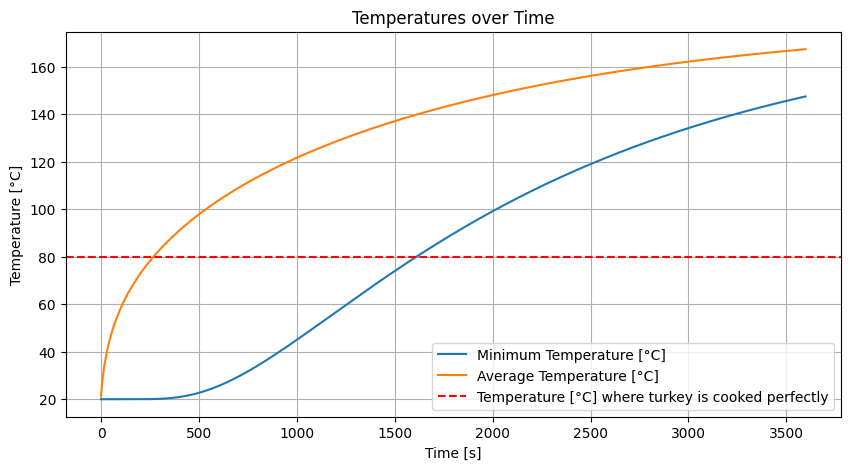

In [57]:
min_temperatures = np.array([])
average_temperatures = np.array([])
for frame in heat_frames:
    min_temperatures = np.append(min_temperatures, np.min(frame[boolean_matrix]))
    average_temperatures = np.append(average_temperatures, np.mean(frame[boolean_matrix]))
plt.figure(figsize=(10,5))
plt.plot(min_temperatures, label='Minimum Temperature [°C]')
plt.plot(average_temperatures, label='Average Temperature [°C]')
plt.axhline(80, color='red', linestyle='--', label='Temperature [°C] where turkey is cooked perfectly')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [°C]')
plt.title('Temperatures over Time')
plt.legend()
plt.grid()
plt.savefig('../img/heat_analysis.png')
plt.show()
